In [2]:
import torch
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter

words = open('names.txt', 'r').read().splitlines()

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [4]:
N = torch.zeros((27, 27), dtype=torch.int32)
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

print(N)

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

In [ ]:
P = (N+1).float()
P /= P.sum(1, keepdims=True)

g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

In [ ]:
xs, ys = [], []
# for w in words[:1][0:1]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()

In [2]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [ ]:
for k in range(1):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  
  logits = xenc @ W
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character

  loss = -probs[torch.arange(num), ys].log().mean() + 0.05*(W**2).mean()

  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()

  # update
  W.data += -1 * W.grad
 


In [4]:
!pip install matplotlib


     ---------------------------------------- 7.6/7.6 MB 27.2 MB/s eta 0:00:00
     ------------------------------------- 480.5/480.5 kB 14.7 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 27.3 MB/s eta 0:00:00
     ---------------------------------------- 56.1/56.1 kB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 103.1/103.1 kB ? eta 0:00:00



[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


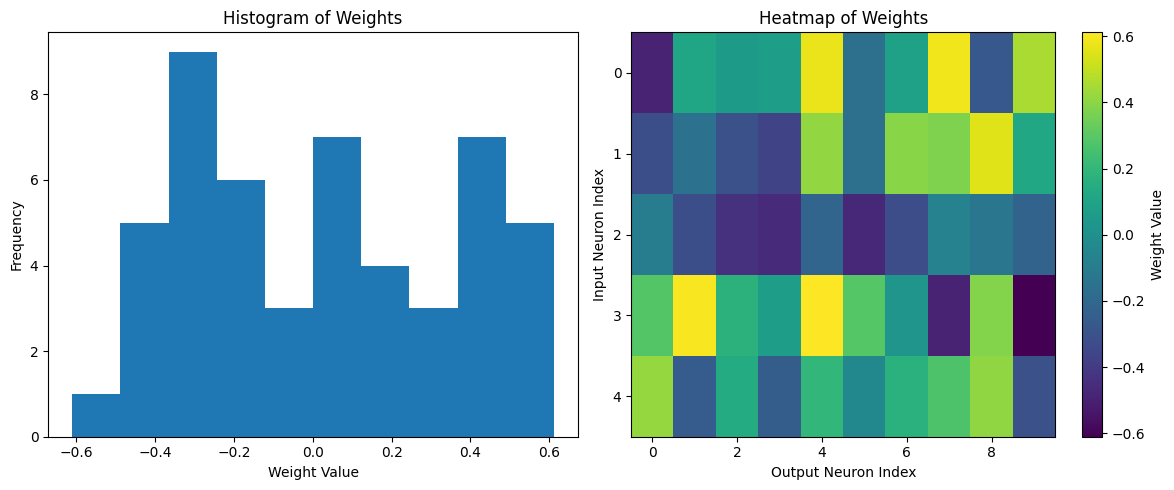

In [40]:
# Importing necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt

# Build a simple model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=(5,), activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Initialize model with some input
model.compile(optimizer='sgd', loss='binary_crossentropy')
model.fit(tf.random.normal([100, 5]), tf.squeeze(tf.random.categorical(tf.constant([[0.5, 0.5]]), 100)), epochs=1, verbose=0)

# Extracting weights of the first dense layer
weights = model.layers[0].get_weights()[0]
#print(weights)


#Visualizing the weights
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(weights.flatten())
plt.title('Histogram of Weights')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.imshow(weights, cmap='viridis', aspect='auto')
plt.title('Heatmap of Weights')
plt.xlabel('Output Neuron Index')
plt.ylabel('Input Neuron Index')
plt.colorbar(label='Weight Value')
plt.tight_layout()
plt.show()


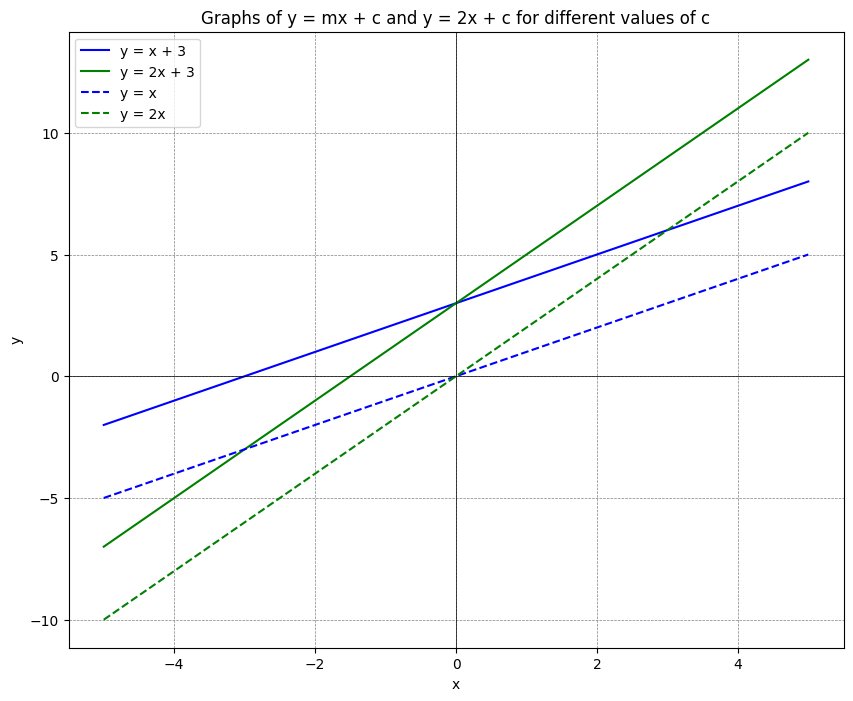

In [1]:
# Redefine the functions
def function_1(x, c):
    return x + c

def function_2(x, c):
    return 2*x + c

import numpy as np
import matplotlib.pyplot as plt

# Define the x values and the functions again
x_values = np.linspace(-5, 5, 400)

# Plotting
plt.figure(figsize=(10, 8))

# Scenario 1: c = 3 for both equations
plt.plot(x_values, function_1(x_values, 3), label="y = x + 3", color='blue')
plt.plot(x_values, function_2(x_values, 3), label="y = 2x + 3", color='green')

# Scenario 2: c = 0 for both equations (for clarity)
plt.plot(x_values, function_1(x_values, 0), '--', label="y = x", color='blue')
plt.plot(x_values, function_2(x_values, 0), '--', label="y = 2x", color='green')

# Annotations, labels, and legends
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.title("Graphs of y = mx + c and y = 2x + c for different values of c")
plt.xlabel("x")
plt.ylabel("y")

# Show the plot
plt.show()

